<a href="https://colab.research.google.com/github/mkkkkkkkkkkkkkkkkkkkk/POSI-MON1/blob/main/tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 5

## Introduction

### Logistic Regression

**Logistic Regression** is a statistical model used to predict the probability of an event occurring (e.g., $ Y = 1 $) based on one or more explanatory variables $$ X_1, X_2, \ldots, X_n $$

In contrast to linear regression, logistic regression models the probability in such a way that it always stays within the range $[0, 1]$.

It uses the so-called **logistic (sigmoidal) function**, defined as:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$


### Sigmoidal Function

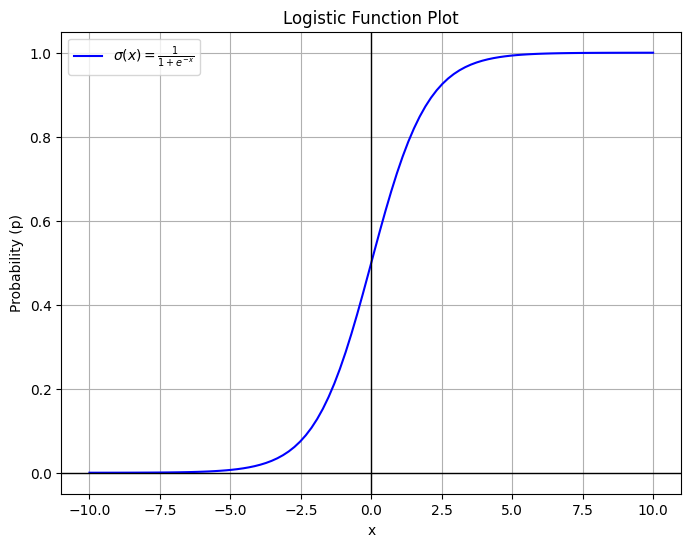

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definition of the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Values of x
x = np.linspace(-10, 10, 100)

# Calculate the logistic function values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='b')
plt.title('Logistic Function Plot')
plt.xlabel('x')
plt.ylabel('Probability (p)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(True)
plt.legend()
plt.show()


### Example of Logistic Regression Calculation

Suppose we want to predict the probability that a customer will purchase a product ($Y = 1$),
based on the number of pages viewed ($X$).

The logistic regression model is given by:

$$
p = P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Let the model parameters be:
$$
\beta_0 = -4, \quad \beta_1 = 0.8
$$

<br>

### 1. Calculate the probability of purchase when the customer viewed $X = 5$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 5)}} = \frac{1}{1 + e^{-(0)}} = \frac{1}{2} = 0.5
$$

Thus, the model predicts that the **probability of purchase is 50%**.

<br>

### 2. For $X = 8$ pages:

$$
p = \frac{1}{1 + e^{-(-4 + 0.8 \cdot 8)}} = \frac{1}{1 + e^{-2.4}} \approx 0.916
$$

This means that a customer who viewed 8 pages has about **91.6% chance of purchas**


### Difference Between Linear and Logistic Regression

**1. Linear Regression**

- Used to predict **continuous values**.  
- The model takes the form:
$$
y = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n + \varepsilon
$$
- The result $y$ can take any real value.

**2. Logistic Regression**

- Used to predict the **probability of an event**, most often binary classification.  
- The model takes the form:
$$
p = P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$
- The result $p$ always lies within the range $[0, 1]$.

<br><br>

**Summary at a glance**:

| Feature              | Linear Regression        | Logistic Regression      |
|----------------------|--------------------------|--------------------------|
| Dependent variable type | Continuous               | Binary (0/1)             |
| Model output         | Any real number          | Probability [0,1]        |
| Activation function  | None / Linear            | Sigmoid                 |


### Example of Logistic Regression in Python Code


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


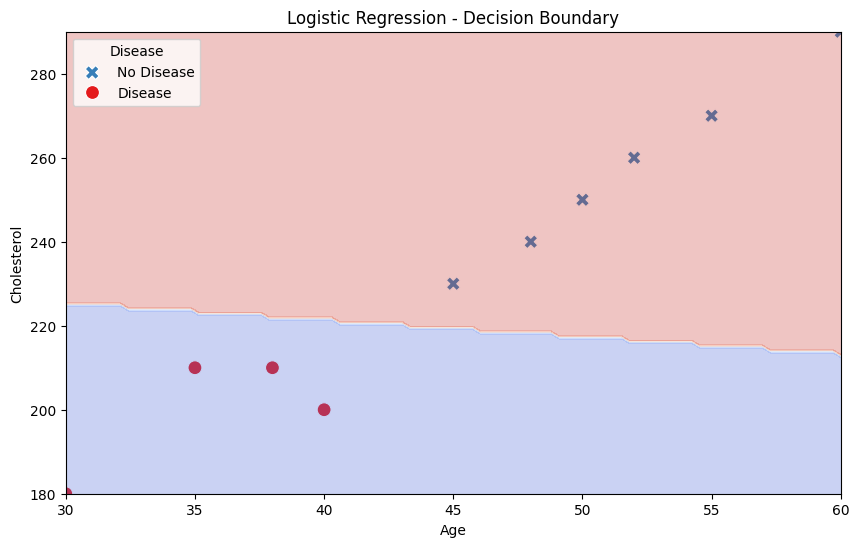

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Creating sample data
data = {
    'Age': [45, 50, 38, 60, 55, 40, 30, 35, 48, 52],
    'Cholesterol': [230, 250, 210, 290, 270, 200, 180, 210, 240, 260],
    'Has_Disease': [1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]  # Independent variables
y = df['Has_Disease']  # Dependent variable

# Split the data into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict results on the test set
y_pred = model.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of data distribution with disease label
sns.scatterplot(x='Age', y='Cholesterol', hue='Has_Disease', style='Has_Disease', data=df, palette="Set1", s=100)

# Generate prediction values based on the model
xx, yy = np.meshgrid(np.linspace(X['Age'].min(), X['Age'].max(), 100),
                     np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary of logistic regression
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

plt.title("Logistic Regression - Decision Boundary")
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Disease', loc='upper left', labels=["No Disease", "Disease"])
plt.show()


### Metrics for Model Evaluation in Classification Tasks

# 1. Accuracy

Accuracy measures the percentage of correct predictions made by the model. If we have:

- \(TP\) – True Positives  
- \(TN\) – True Negatives  
- \(FP\) – False Positives  
- \(FN\) – False Negatives  

accuracy is defined as:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

<br>

# 2. Precision

Precision tells us what percentage of observations predicted as positive are actually positive:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

<br>

# 3. Recall / Sensitivity

Sometimes it is also useful to calculate recall, which measures the model's ability to detect true positives:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

<br>

# 4. F1-score

The F1-score is a metric that combines both precision and recall into a single value. It is the **harmonic mean** of precision and recall, accounting for both false positives and false negatives.

Definition:

$$
F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

where:

- $\text{Precision} = \frac{TP}{TP + FP}$
- $\text{Recall} = \frac{TP}{TP + FN}$

F1-score is particularly useful when classes are imbalanced, as it accounts for both precision and recall.

<br><br>

| Metric | Definition | Formula |
|--------|------------|---------|
| **Accuracy** | The percentage of correctly classified cases | $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$ |
| **Precision** | The percentage of true positives among those predicted as positive | $$\text{Precision} = \frac{TP}{TP + FP}$$ |
| **Recall / Sensitivity** | The percentage of true positives detected by the model | $$\text{Recall} = \frac{TP}{TP + FN}$$ |
| **Specificity** | The percentage of true negatives detected by the model | $$\text{Specificity} = \frac{TN}{TN + FP}$$ |
| **F1-score** | The harmonic mean of precision and recall | $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ |

### Example of Using Metrics for Logistic Regression in Python Code


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

np.random.seed(123)
data = {
    'Age': np.random.randint(30, 70, size=100),
    'Cholesterol': np.random.randint(180, 300, size=100),
    'Has_Disease': np.random.randint(0, 2, size=100)  # random 0 or 1
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the data into independent variables (X) and dependent variable (y)
X = df[['Age', 'Cholesterol']]
y = df['Has_Disease']

# Split the data into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the results on the test set
y_pred = model.predict(X_test)

# Check model accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Model accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')


Model accuracy: 75.00%
Precision: 70.59%
Recall: 100.00%
F1-score: 82.76%


## Exercise
For the dataset `heart_disease_uci.csv`, perform DEA analysis and logistic regression for the attribute `num`.

### Column Descriptions

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type  
  - Values: `[typical angina, atypical angina, non-anginal, asymptomatic]`
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results  
  - Values: `[normal, stt abnormality, lv hypertrophy]`
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina  
  - Values: `[True, False]`
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**:  
  - Values: `[normal, fixed defect, reversible defect]`
- **num**: The predicted attribute


Make sure to:
- Check for missing data,
- Check for correlation between features,
- Look for outliers,
- Validate the model using metrics,
- Visualize the data and results.


In [ ]:

import os
import glob
import inspect
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
from sklearn.linear_model import LogisticRegression
from scipy.optimize import linprog  # for DEA
RNG_SEED = 42
sns.set(style="whitegrid", context="talk")
# Helpers
def ensure_dir(path="figs"):
    if not os.path.exists(path):
        os.makedirs(path)
    return path
def savefig(name):
    outdir = ensure_dir("figs")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, name), dpi=150, bbox_inches="tight")
    plt.close()
def read_heart_csv(filename="heart_disease_uci.csv") -> pd.DataFrame:
    """Robustly locate the CSV. Tries common places + recursive search."""
    candidates = [
        Path(filename),
        Path.cwd() / filename,
        Path.cwd().parent / filename,
        Path("/mnt/data") / filename,  # common in hosted notebooks
    ]
    for p in candidates:
        if p.exists():
            print(f"[data] Using: {p.resolve()}")
            return pd.read_csv(p)
    hits = glob.glob(f"**/{filename}", recursive=True)
    if hits:
        p = Path(hits[0])
        print(f"[data] Using (found): {p.resolve()}")
        return pd.read_csv(p)
    raise FileNotFoundError(
        f"Could not find {filename}. Checked {len(candidates)} candidates and recursive search."
    )
def make_ohe() -> OneHotEncoder:
    """Create OneHotEncoder that works across sklearn versions."""
    sig = inspect.signature(OneHotEncoder)
    kwargs = {"handle_unknown": "ignore"}
    if "sparse_output" in sig.parameters:
        kwargs["sparse_output"] = False
    else:
        kwargs["sparse"] = False
    return OneHotEncoder(**kwargs)
# Load
df = read_heart_csv("heart_disease_uci.csv")
# unify common column name typo
if "thalach" in df.columns and "thalch" not in df.columns:
    df = df.rename(columns={"thalach": "thalch"})
#Normalize dtypes & tidy labels (safe)
# strip whitespace ONLY on columns that are object and contain strings
obj_cols = df.select_dtypes(include=["object"]).columns
for c in obj_cols:
    # work only on entries that are strings; leave others as-is
    df[c] = df[c].map(lambda v: v.strip() if isinstance(v, str) else v)
# unify booleans if they came as strings; cast to numeric 0/1
for col in ["exang", "fbs"]:
    if col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].map(
                lambda v: 1 if str(v).strip().lower() in {"true","1"}
                else (0 if str(v).strip().lower() in {"false","0"} else np.nan)
            )
        elif df[col].dtype == bool:
            df[col] = df[col].astype(int)
        # final attempt to force numeric (keeps NaN if not convertible)
        df[col] = pd.to_numeric(df[col], errors="coerce")
# consistent categoricals (only if present)
for col in ["origin", "cp", "restecg", "slope", "thal", "sex", "dataset"]:
    if col in df.columns:
        df[col] = df[col].astype("category")
# target handling (if num is multiclass 0..4, convert to binary: 0 -> 0, 1-4 -> 1)
if df["num"].nunique() > 2:
    df["num_binary"] = (df["num"] > 0).astype(int)
    target_col = "num_binary"
else:
    target_col = "num"
#  Missing Data
print("\n=== Missing values (count) ===")
print(df.isna().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Map")
savefig("missingness_map.png")
# Basic distributions
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in numeric_cols]
cat_cols = [c for c in cat_cols if c != target_col and c != "num"]
# Histograms for numeric
n = len(numeric_cols)
if n > 0:
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols * 5, nrows * 4))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(nrows, ncols, i)
        sns.histplot(df[col], kde=True)
        plt.title(col)
    plt.suptitle("Numeric Feature Distributions", y=1.02)
    savefig("numeric_histograms.png")

# Bar plots for categoricals
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    df[col].value_counts(dropna=False).head(20).plot(kind="bar")
    plt.title(f"{col} - value counts")
    plt.xlabel(col)
    plt.ylabel("count")
    savefig(f"vc_{col}.png")
# Correlations (bug-proof)
corr_cols = list(dict.fromkeys(numeric_cols + [target_col]))  # remove dupes, keep order
corr_df = df[corr_cols].corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, cmap="coolwarm", annot=False, square=True)
plt.title("Correlation Heatmap (Numeric)")
savefig("correlation_heatmap.png")
if target_col in corr_df.columns:
    target_series = corr_df[target_col]
    if isinstance(target_series, pd.DataFrame):
        target_series = target_series.iloc[:, 0]
    target_corr = target_series.sort_values(ascending=False)
    print("\n=== Correlation with target (numeric only) ===")
    print(target_corr)
#Outliers (IQR)
def iqr_outlier_mask(series, k=1.5):
    q1, q3 = np.nanpercentile(series.dropna(), [25, 75])
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (series < lower) | (series > upper), (lower, upper)
outlier_summary = []
for col in numeric_cols:
    mask, bounds = iqr_outlier_mask(df[col])
    count = int(mask.sum())
    outlier_summary.append((col, count, bounds))
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col} (outliers: {count})")
    savefig(f"box_{col}.png")
print("\n=== Outlier summary (IQR=1.5) ===")
for col, count, (low, high) in outlier_summary:
    print(f"{col:>12}: outliers={count:>4} | bounds=({low:.2f}, {high:.2f})")
#DEA (CCR, output-oriented)
#Choice of inputs/outputs:
#Inputs (to be minimized): age, trestbps, chol, oldpeak, ca  (unfavorable higher values)
#Outputs (to be maximized): thalch (max heart rate achieved)
#Adjust the lists below if your instructor specifies different sets.
dea_inputs = [c for c in ["age", "trestbps", "chol", "oldpeak", "ca"] if c in df.columns]
dea_outputs = [c for c in ["thalch"] if c in df.columns]
# drop rows with missing in DEA variables
dea_df = df[dea_inputs + dea_outputs].dropna().copy()
X = dea_df[dea_inputs].to_numpy(dtype=float)   # shape: n x m
Y = dea_df[dea_outputs].to_numpy(dtype=float)  # shape: n x s
n, m = X.shape[0], X.shape[1]
s = Y.shape[1]
def dea_ccr_output(X, Y):
    """
    Output-oriented CCR DEA.
    For each DMU i: maximize phi
        s.t. X @ lambda <= x_i
             Y @ lambda >= phi * y_i
             lambda >= 0, phi >= 1
    Returns: phi (expansion factor), efficiency_out = 1/phi in (0,1]
    """
    n, m = X.shape[0], X.shape[1]
    s = Y.shape[1]
    results_phi = np.zeros(n)
    results_eff = np.zeros(n)

    for i in range(n):
        # Variables: [lambda_1..lambda_n, phi]
        c = np.zeros(n + 1)
        c[-1] = -1.0  # maximize phi -> minimize -phi
        # Inequalities A_ub @ vars <= b_ub
        # 1) X @ lambda <= x_i
        A1 = np.hstack([X.T, np.zeros((m, 1))])     # m x (n+1)
        b1 = X[i, :]
        # 2) -Y @ lambda + y_i * phi <= 0  (i.e., Y @ lambda >= phi * y_i)
        A2 = np.hstack([-Y.T, Y[i, :].reshape(s, 1)])  # s x (n+1)
        b2 = np.zeros(s)
        A_ub = np.vstack([A1, A2])
        b_ub = np.hstack([b1, b2])
        # Bounds: lambda_j >= 0; phi >= 1
        bounds = [(0, None)] * n + [(1, None)]
        res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")
        if not res.success:
            results_phi[i] = np.nan
            results_eff[i] = np.nan
        else:
            phi = res.x[-1]
            results_phi[i] = phi
            results_eff[i] = 1.0 / phi
    return results_phi, results_eff
phi, eff = dea_ccr_output(X, Y)
dea_df["dea_phi_out"] = phi
dea_df["dea_eff_out"] = eff  # 1/phi, in (0,1]; 1 == efficient
# attach back to main df (align on index)
df.loc[dea_df.index, "dea_phi_out"] = dea_df["dea_phi_out"]
df.loc[dea_df.index, "dea_eff_out"] = dea_df["dea_eff_out"]
# Export DEA scores
ensure_dir("figs")
dea_df[dea_inputs + dea_outputs + ["dea_phi_out", "dea_eff_out"]].to_csv("figs/dea_scores.csv", index=False)
# DEA visualizations
plt.figure(figsize=(8, 5))
sns.histplot(df["dea_eff_out"].dropna(), bins=20, kde=True)
plt.xlabel("DEA Efficiency (output-oriented, 1/phi)")
plt.title("DEA Efficiency Distribution")
savefig("dea_efficiency_hist.png")
if "num_binary" in df.columns:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=df["num_binary"], y=df["dea_eff_out"])
    plt.xlabel("num_binary (0=no disease, 1=disease)")
    plt.ylabel("DEA Efficiency (1/phi)")
    plt.title("DEA Efficiency vs Disease")
    savefig("dea_efficiency_by_num.png")
# Simple numeric check: correlation between DEA efficiency and target
if "dea_eff_out" in df.columns:
    corr_dea = df[["dea_eff_out", target_col]].dropna().corr().iloc[0, 1]
    print(f"\nDEA: corr(dea_eff_out, {target_col}) = {corr_dea:.3f}")
#Logistic Regression
drop_cols = ["id"] if "id" in df.columns else []
X = df.drop(columns=[c for c in ["num", target_col] if c in df.columns] + drop_cols)
y = df[target_col]
X_numeric = X.select_dtypes(include=[np.number]).columns.tolist()
X_categorical = [c for c in X.columns if c not in X_numeric]
print("\n=== Feature sets ===")
print("Numeric:", X_numeric)
print("Categorical:", X_categorical)
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", make_ohe())
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, X_numeric),
        ("cat", categorical_pipe, X_categorical)
    ],
    remainder="drop"
)

logreg = LogisticRegression(max_iter=1000, class_weight="balanced", solver="lbfgs")

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", logreg)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RNG_SEED
)

# Train
clf.fit(X_train, y_train)
# Evaluate (Holdout)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
print("\n=== Holdout metrics (20% test) ===")
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1       : {f1:.3f}")
print(f"ROC AUC  : {roc:.3f}")
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))
# Save holdout metrics to CSV
pd.DataFrame({
    "metric": ["accuracy", "precision", "recall", "f1", "roc_auc"],
    "value":  [acc,         prec,        rec,      f1,   roc]
}).to_csv("figs/holdout_metrics.csv", index=False)
# Confusion matrices
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
savefig("cm_test.png")
cm_norm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=[0, 1])
disp.plot(values_format=".2f", cmap="Blues", colorbar=False)
plt.title("Confusion Matrix (Normalized)")
savefig("cm_test_normalized.png")
# ROC & PR
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve (Test)")
savefig("roc_test.png")
PrecisionRecallDisplay.from_predictions(y_test, y_prob)
plt.title("Precision-Recall Curve (Test)")
savefig("pr_test.png")
# Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RNG_SEED)
cv_scores = cross_validate(
    clf, X, y, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    cv=cv, n_jobs=-1, return_train_score=False
)
print("\n=== 5-Fold CV (mean ± std) ===")
for metric in ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]:
    print(f"{metric.replace('test_',''):>9}: {cv_scores[metric].mean():.3f} ± {cv_scores[metric].std():.3f}")
pd.DataFrame(cv_scores).to_csv("figs/cv_scores_raw.csv", index=False)
# Coefficients / Odds Ratios
def get_feature_names(ct: ColumnTransformer):
    names = []
    for name, trans, cols in ct.transformers_:
        if name == 'remainder' and trans == 'drop':
            continue
        if hasattr(trans, "named_steps"):
            last = list(trans.named_steps.values())[-1]
            if hasattr(last, "get_feature_names_out"):
                try:
                    fn = last.get_feature_names_out(cols)
                except TypeError:
                    fn = last.get_feature_names_out()
                names.extend(fn)
            else:
                if isinstance(cols, list): names.extend(cols)
                else: names.append(cols)
        else:
            if isinstance(cols, list): names.extend(cols)
            else: names.append(cols)
    return np.array(names, dtype=object)

model_step = clf.named_steps["model"]
feature_names = get_feature_names(clf.named_steps["preprocess"])
coefs = pd.DataFrame({
    "feature": feature_names,
    "coef": model_step.coef_.ravel()
}).sort_values("coef", ascending=False)
coefs["odds_ratio"] = np.exp(coefs["coef"])
coefs.to_csv("figs/logreg_coefficients.csv", index=False)
print("\n=== Top positive drivers (odds ratio) ===")
print(coefs.head(15).to_string(index=False))
print("\n=== Top negative drivers (odds ratio) ===")
print(coefs.tail(15).to_string(index=False))
top_k = min(20, len(coefs))
coefs_plot = coefs.reindex(coefs["coef"].abs().sort_values(ascending=False).index).head(top_k)
plt.figure(figsize=(10, 8))
sns.barplot(x="coef", y="feature", data=coefs_plot)
plt.axvline(0, ls="--", lw=1, c="k")
plt.title("Top Logistic Regression Coefficients (absolute)")
savefig("top_coefficients.png")
print("\nDone. Figures & CSVs saved in ./figs")


[data] Using (found): /content/sample_data/heart_disease_uci.csv

=== Missing values (count) ===
id              0
age             0
sex             0
dataset         0
cp              0
trestbps       59
chol           30
fbs            90
restecg         2
thalch         55
exang          55
oldpeak        62
slope         309
ca            611
thal          486
num             0
num_binary      0
dtype: int64

=== Correlation with target (numeric only) ===
num_binary    1.000000
num           0.783387
exang         0.463619
ca            0.455599
oldpeak       0.385528
id            0.356086
age           0.282700
fbs           0.142565
trestbps      0.106233
chol         -0.230583
thalch       -0.394503
Name: num_binary, dtype: float64

=== Outlier summary (IQR=1.5) ===
          id: outliers=   0 | bounds=(-458.50, 1379.50)
         age: outliers=   0 | bounds=(27.50, 79.50)
    trestbps: outliers=  28 | bounds=(90.00, 170.00)
        chol: outliers= 183 | bounds=(35.50, 407.50)
 